# Assignment Two
## Task A: NOT-operator

In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [17]:
class Model:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)
        
    def logits(self, x):
        return x @ self.W + self.b
    
    def F(self, x):
        return torch.sigmoid(self.logits(x))
    
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [18]:
model = Model()

#### x_train and y_train based on the NOT-operator

In [19]:
x_train = torch.tensor([[0.], [1.]])
y_train = torch.tensor([[1.], [0.]])

optimizer = torch.optim.SGD([model.W, model.b], lr=0.1)

### Training and loss output

In [27]:
for epoch in range(1000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[-7.2816]], requires_grad=True), b = tensor([[3.4316]], requires_grad=True), loss = tensor(0.0264, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


### Plotting

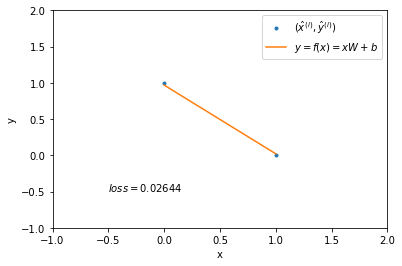

In [36]:
plt.plot(x_train, y_train, '.', label='$(\\hat x^{(i)},\\hat y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])
axes = plt.gca()
axes.set_xlim([torch.min(x_train)-1, torch.max(x_train)+1])
axes.set_ylim([torch.min(y_train)-1, torch.max(y_train)+1])
plt.plot(x, model.F(x).detach(), label='$y = f(x) = xW+b$')
plt_info = plt.text(-0.5, -0.5, '')
plt_info.set_text('$loss = %.5f$' %(model.loss(x_train, y_train)))
plt.plot(model.loss(x_train, y_train).detach())
plt.legend()
plt.show()

#### Graph visualizes the NOT-operator
##### x = 0 gives y = 1, x = 1 gives y = 0